In [3]:
from pyHalo.preset_models import CDM, WDM
from pyHalo.plotting_routines import *
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors

np.random.seed(111)

### Convergence maps

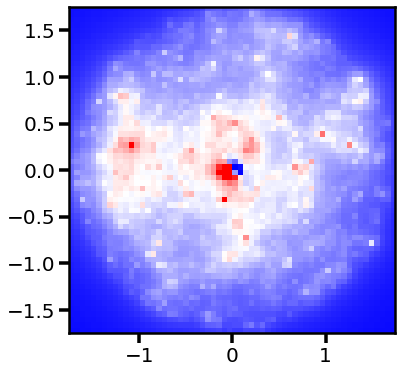

In [13]:
cdm_realization = CDM(0.5, 1.5, 0.05, cone_opening_angle_arcsec=3.5)
out = plot_multiplane_convergence(cdm_realization, 
                                  npix=60,
                             cone_opening_angle_arcsec=3.5, 
                             lens_model_list_macro=None, 
                             kwargs_lens_macro=None, 
                             redshift_list_macro=None,
                                 show_critical_curve=False)



### Spatial distribution of subhalos

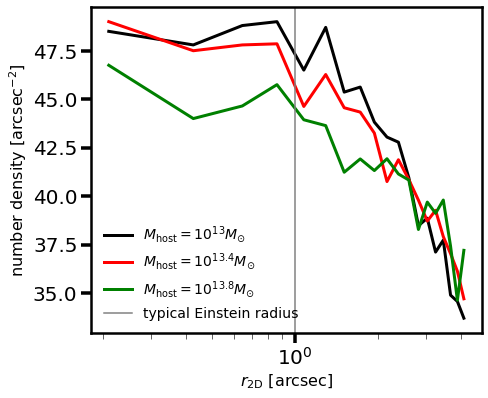

In [2]:
cone_opening_angle_arcsec = 8.0
sigma_sub = 0.4
cdm_spatial_distribution1 = CDM(0.5, 1.5, sigma_sub=sigma_sub, LOS_normalization=0.0, 
                               cone_opening_angle_arcsec=cone_opening_angle_arcsec,
                               log_m_host=13.0)
cdm_spatial_distribution2 = CDM(0.5, 1.5, sigma_sub=sigma_sub, LOS_normalization=0.0, 
                               cone_opening_angle_arcsec=cone_opening_angle_arcsec, 
                               log_m_host=13.4)
cdm_spatial_distribution3 = CDM(0.5, 1.5, sigma_sub=sigma_sub, LOS_normalization=0.0, 
                               cone_opening_angle_arcsec=cone_opening_angle_arcsec, 
                               log_m_host=13.8)

# here you can optionally keep the total number of halos fixed to isolate differences in the spatial distribution
cdm_spatial_distribution2.halos = cdm_spatial_distribution2.halos[0:len(cdm_spatial_distribution1.halos)]
cdm_spatial_distribution3.halos = cdm_spatial_distribution3.halos[0:len(cdm_spatial_distribution1.halos)]

fig = plt.figure(1)
fig.set_size_inches(7,6)
ax = plt.subplot(111)
kwargs_plot={'lw':3, 'label': r'$M_{\rm{host}} = 10^{13} M_{\odot}$'}
plot_subhalo_spatial_distribution(cdm_spatial_distribution1, 
                                  max_range_arcsec=cone_opening_angle_arcsec/2, ax=ax, 
                                  nbins=30, color='k', kwargs_plot=kwargs_plot)
kwargs_plot={'lw':3, 'label': r'$M_{\rm{host}} = 10^{13.4} M_{\odot}$'}
plot_subhalo_spatial_distribution(cdm_spatial_distribution2, 
                                  max_range_arcsec=cone_opening_angle_arcsec/2, 
                                  ax=ax, nbins=30, color='r', kwargs_plot=kwargs_plot)
kwargs_plot={'lw':3, 'label': r'$M_{\rm{host}} = 10^{13.8} M_{\odot}$'}
plot_subhalo_spatial_distribution(cdm_spatial_distribution3, 
                                  max_range_arcsec=cone_opening_angle_arcsec/2, 
                                  ax=ax, nbins=30, color='g', kwargs_plot=kwargs_plot)

ax.set_xscale('log')
#ax.set_ylim(50, 150)
#ax.set_yscale('log')
plt.axvline(1.0, color='0.5', label='typical Einstein radius')
plt.legend(fontsize=14, frameon=False)

### Subhalo mass function (bound and infall)

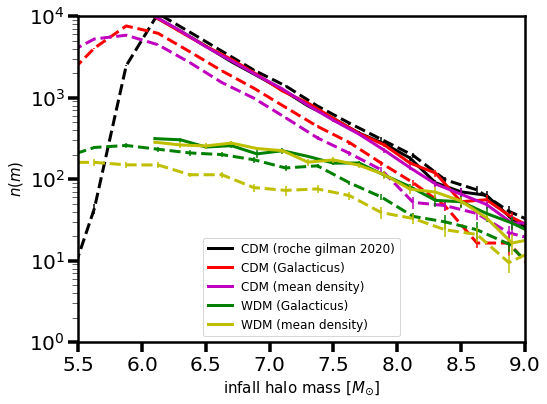

In [15]:
from copy import deepcopy
from pyHalo.truncation_models import truncation_models

sigma_sub = 0.2
log_10_half_mode_mass = 7.5
cdm = CDM(0.5, 1.5, sigma_sub=sigma_sub, LOS_normalization=0.0, 
         truncation_model_subhalos='TRUNCATION_ROCHE_GILMAN2020')

cdm_truncation_v2 = CDM(0.5, 1.5, sigma_sub=sigma_sub, LOS_normalization=0.0, 
                       truncation_model_subhalos='TRUNCATION_GALACTICUS')

cdm_truncation_v3 = CDM(0.5, 1.5, sigma_sub=sigma_sub, LOS_normalization=0.0, 
                       truncation_model_subhalos='TRUNCATION_MEAN_DENSITY',
                       kwargs_truncation_model_subhalos={'median_rt_over_rs': 2.0, 'c_power': 3.0})

cdm_concentration_rescaled = deepcopy(cdm_truncation_v2)

wdm = WDM(0.5, 1.5, log_mc=log_10_half_mode_mass, sigma_sub=sigma_sub, LOS_normalization=0.0, 
                       truncation_model_subhalos='TRUNCATION_GALACTICUS')

wdm_v2 = WDM(0.5, 1.5, log_mc=log_10_half_mode_mass, sigma_sub=sigma_sub, LOS_normalization=0.0, 
                       truncation_model_subhalos='TRUNCATION_MEAN_DENSITY',
            kwargs_truncation_model_subhalos={'median_rt_over_rs': 2.0, 'c_power': 3.0})

fig = plt.figure(1)
ax = plt.subplot(111)
fig.set_size_inches(8, 6)
kwargs_plot={'lw':3, 'label': 'CDM (roche gilman 2020)'}
plot_subhalo_mass_functon(cdm, log_m_low=6.0, log_m_high=10.0, bound_mass_function=False, nbins=20,
                                  n_bootstrap=10, ax=ax, kwargs_plot=kwargs_plot, color='k')
kwargs_plot={'linestyle': '--', 'lw':3}
plot_subhalo_mass_functon(cdm, log_m_low=5.0, log_m_high=10.0, bound_mass_function=True, nbins=20,
                                  n_bootstrap=10, ax=ax, kwargs_plot=kwargs_plot, color='k')

kwargs_plot={'lw':3, 'label':'CDM (Galacticus)'}
plot_subhalo_mass_functon(cdm_truncation_v2, log_m_low=6.0, log_m_high=10.0, bound_mass_function=False, nbins=20,
                                  n_bootstrap=10, ax=ax, kwargs_plot=kwargs_plot, color='r')
kwargs_plot={'linestyle': '--','lw':3}
plot_subhalo_mass_functon(cdm_truncation_v2, log_m_low=5.0, log_m_high=10.0, bound_mass_function=True, nbins=20,
                                  n_bootstrap=10, ax=ax, kwargs_plot=kwargs_plot, color='r')

kwargs_plot={'lw':3, 'label':'CDM (mean density)'}
plot_subhalo_mass_functon(cdm_truncation_v3, log_m_low=6.0, log_m_high=10.0, bound_mass_function=False, nbins=20,
                                  n_bootstrap=10, ax=ax, kwargs_plot=kwargs_plot, color='m')
kwargs_plot={'linestyle': '--','lw':3}
plot_subhalo_mass_functon(cdm_truncation_v3, log_m_low=5.0, log_m_high=10.0, bound_mass_function=True, nbins=20,
                                  n_bootstrap=10, ax=ax, kwargs_plot=kwargs_plot, color='m')

kwargs_plot={'lw':3, 'label':'WDM (Galacticus)'}
plot_subhalo_mass_functon(wdm, log_m_low=6.0, log_m_high=10.0, bound_mass_function=False, nbins=20,
                                  n_bootstrap=10, ax=ax, kwargs_plot=kwargs_plot, color='g')
kwargs_plot={'linestyle': '--','lw':3}
plot_subhalo_mass_functon(wdm, log_m_low=5.0, log_m_high=10.0, bound_mass_function=True, nbins=20,
                                  n_bootstrap=10, ax=ax, kwargs_plot=kwargs_plot, color='g')

kwargs_plot={'lw':3, 'label':'WDM (mean density)'}
plot_subhalo_mass_functon(wdm_v2, log_m_low=6.0, log_m_high=10.0, bound_mass_function=False, nbins=20,
                                  n_bootstrap=10, ax=ax, kwargs_plot=kwargs_plot, color='y')
kwargs_plot={'linestyle': '--','lw':3}
plot_subhalo_mass_functon(wdm_v2, log_m_low=5.0, log_m_high=10.0, bound_mass_function=True, nbins=20,
                                  n_bootstrap=10, ax=ax, kwargs_plot=kwargs_plot, color='y')

ax.set_ylim(1, 10000)
ax.set_xlim(5.5, 9.0)
ax.legend(fontsize=12)

for i, halo in enumerate(cdm_concentration_rescaled.halos):
    halo._c = cdm_truncation_v2.halos[i].c / 5.0

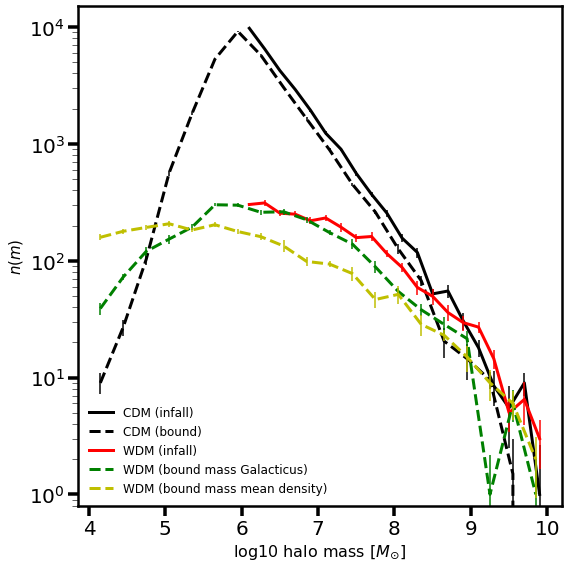

In [12]:
fig = plt.figure(1)
fig.set_size_inches(8,8)
ax = plt.subplot(111)
kwargs_plot={'lw':3, 'label': 'CDM (infall)'}
plot_subhalo_mass_functon(cdm_truncation_v2, log_m_low=6.0, log_m_high=10.0, bound_mass_function=False, nbins=20,
                                  n_bootstrap=10, ax=ax, kwargs_plot=kwargs_plot, color='k')
kwargs_plot={'linestyle': '--', 'lw':3, 'label': 'CDM (bound)'}
plot_subhalo_mass_functon(cdm_truncation_v2, log_m_low=4.0, log_m_high=10.0, bound_mass_function=True, nbins=20,
                                  n_bootstrap=10, ax=ax, kwargs_plot=kwargs_plot, color='k')

kwargs_plot={'lw':3, 'label':'WDM (infall)'}
plot_subhalo_mass_functon(wdm, log_m_low=6.0, log_m_high=10.0, bound_mass_function=False, nbins=20,
                                  n_bootstrap=10, ax=ax, kwargs_plot=kwargs_plot, color='r')
kwargs_plot={'linestyle': '--','lw':3, 'label':'WDM (bound mass Galacticus)'}
plot_subhalo_mass_functon(wdm, log_m_low=4.0, log_m_high=10.0, bound_mass_function=True, nbins=20,
                                  n_bootstrap=10, ax=ax, kwargs_plot=kwargs_plot, color='g')
kwargs_plot={'linestyle': '--','lw':3, 'label':'WDM (bound mass mean density)'}
plot_subhalo_mass_functon(wdm_v2, log_m_low=4.0, log_m_high=10.0, bound_mass_function=True, nbins=20,
                                  n_bootstrap=10, ax=ax, kwargs_plot=kwargs_plot, color='y')

ax.set_ylim(0.8, 15000)
ax.set_xlabel('log10 halo mass '+r'$\left[M_{\odot}\right]$', fontsize=16)
ax.legend(fontsize=12, frameon=False)
plt.tight_layout()
#plt.savefig('infall_vs_bound.pdf')

### Subhalo mass loss

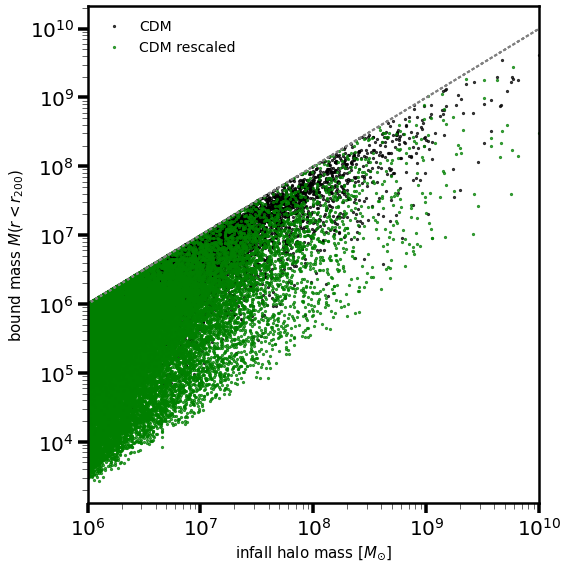

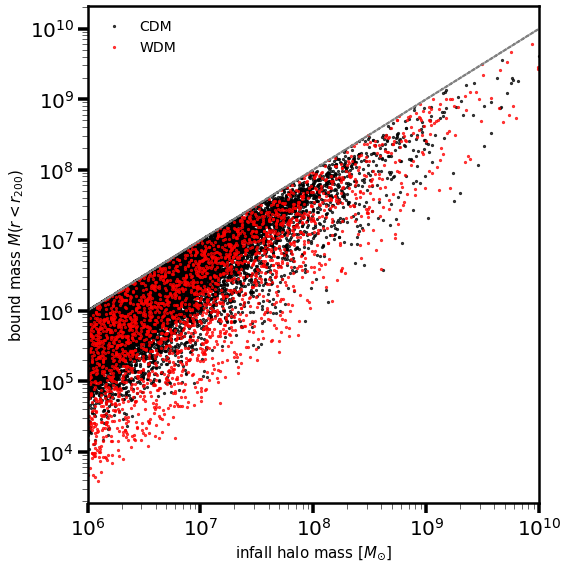

In [13]:
fig = plt.figure(1)
fig.set_size_inches(8,8)
ax = plt.subplot(111)
kwargs_plot={'alpha': 0.75,'s': 5, 'label': 'CDM'}
plot_subhalo_bound_mass(cdm_truncation_v2, ax=ax, kwargs_plot=kwargs_plot, color='k')
kwargs_plot={'alpha': 0.75,'s': 5, 'label': 'CDM rescaled'}
plot_subhalo_bound_mass(cdm_concentration_rescaled, ax=ax, kwargs_plot=kwargs_plot, color='g')
ax.legend(fontsize=14, frameon=False)
ax.set_ylabel('bound mass '+r'$M\left(r<r_{200}\right)$')
plt.tight_layout()

fig = plt.figure(2)
fig.set_size_inches(8,8)
ax = plt.subplot(111)
kwargs_plot={'alpha': 0.75, 's': 5, 'label': 'CDM'}
plot_subhalo_bound_mass(cdm_truncation_v2, ax=ax, kwargs_plot=kwargs_plot, color='k')
kwargs_plot={'alpha': 0.75,'s': 5, 'label': 'WDM'}
plot_subhalo_bound_mass(wdm, ax=ax, kwargs_plot=kwargs_plot, color='r')
ax.legend(fontsize=14, frameon=False)
ax.set_ylabel('bound mass '+r'$M\left(r<r_{200}\right)$')
plt.tight_layout()


### Infall concentration versus bound mass

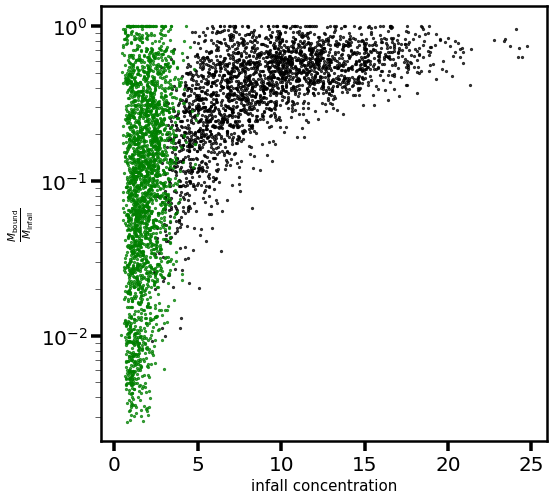

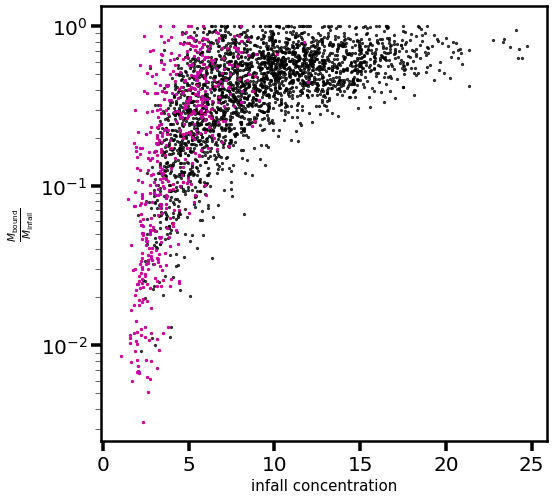

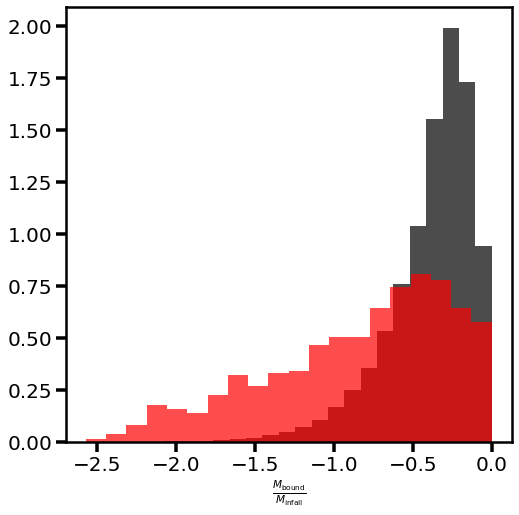

In [14]:
fig = plt.figure(1)
fig.set_size_inches(8,8)
ax = plt.subplot(111)
mass_range = [7.0, 7.5]
kwargs_plot={'alpha': 0.75, 's': 5, 'label': 'CDM'}
plot_subhalo_concentration_versus_bound_mass(cdm_truncation_v2, ax=ax, kwargs_plot=kwargs_plot, 
                                             color='k', log_mlow=mass_range[0], log_mhigh=mass_range[1])
kwargs_plot={'alpha': 0.75, 's': 5, 'label': 'CDM scaled'}
plot_subhalo_concentration_versus_bound_mass(cdm_concentration_rescaled, ax=ax, kwargs_plot=kwargs_plot, color='g',
                                            log_mlow=mass_range[0], log_mhigh=mass_range[1])
plt.show()

fig = plt.figure(2)
fig.set_size_inches(8,8)
ax = plt.subplot(111)
mass_range = [7.0, 7.5]
kwargs_plot={'alpha': 0.75, 's': 5, 'label': 'CDM'}
plot_subhalo_concentration_versus_bound_mass(cdm_truncation_v2, ax=ax, kwargs_plot=kwargs_plot, 
                                             color='k', log_mlow=mass_range[0], log_mhigh=mass_range[1])
kwargs_plot={'alpha': 0.75, 's': 5, 'label': 'WDM\n(Galacticus truncation)'}
plot_subhalo_concentration_versus_bound_mass(wdm, ax=ax, kwargs_plot=kwargs_plot, color='r',
                                            log_mlow=mass_range[0], log_mhigh=mass_range[1])
kwargs_plot={'alpha': 0.75, 's': 5, 'label': 'WDM\n(mean density)'}
plot_subhalo_concentration_versus_bound_mass(wdm, ax=ax, kwargs_plot=kwargs_plot, color='m',
                                            log_mlow=mass_range[0], log_mhigh=mass_range[1])
plt.show()

fig = plt.figure(2)
fig.set_size_inches(8,8)
ax = plt.subplot(111)
mass_range = [6.0, 10.0]
kwargs_plot={'alpha': 0.7, 'label': 'CDM', 'bins': 20}
plot_bound_mass_histogram(cdm_truncation_v2, ax=ax, kwargs_plot=kwargs_plot, 
                                             color='k', log_mlow=mass_range[0], log_mhigh=mass_range[1])
kwargs_plot={'alpha': 0.7, 'label': 'WDM', 'bins': 20}
plot_bound_mass_histogram(wdm, ax=ax, kwargs_plot=kwargs_plot, 
                                             color='r', log_mlow=mass_range[0], log_mhigh=mass_range[1])

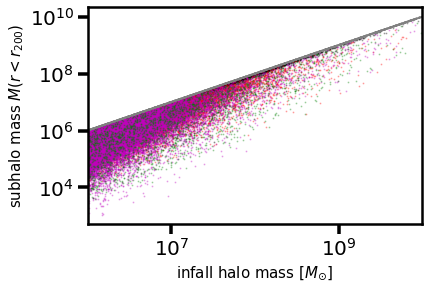

In [16]:
fig = plt.figure(1)

ax = plt.subplot(111)
kwargs_plot={'alpha': 0.25, 's': 1}
plot_subhalo_bound_mass(cdm, ax=ax, kwargs_plot=kwargs_plot, color='k')
kwargs_plot={'alpha': 0.25,'s': 1}
plot_subhalo_bound_mass(cdm_truncation_v2, ax=ax, kwargs_plot=kwargs_plot, color='r')
kwargs_plot={'alpha': 0.25,'s': 1}
plot_subhalo_bound_mass(cdm_truncation_v3, ax=ax, kwargs_plot=kwargs_plot, color='m')
kwargs_plot={'alpha': 0.25,'s': 1}
plot_subhalo_bound_mass(wdm, ax=ax, kwargs_plot=kwargs_plot, color='g')



### Subhalo mass function between CDM and WDM

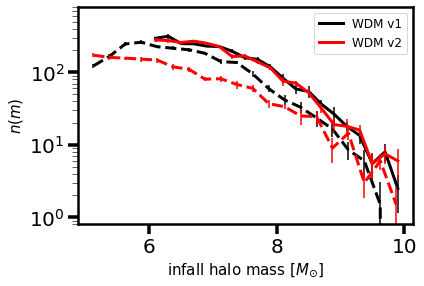

In [17]:
fig = plt.figure(1)
ax = plt.subplot(111)

kwargs_plot={'lw':3, 'label':'WDM v1'}
plot_subhalo_mass_functon(wdm, log_m_low=6.0, log_m_high=10.0, bound_mass_function=False, nbins=20,
                                  n_bootstrap=10, ax=ax, kwargs_plot=kwargs_plot, color='k')
kwargs_plot={'linestyle': '--','lw':3}
plot_subhalo_mass_functon(wdm, log_m_low=5.0, log_m_high=10.0, bound_mass_function=True, nbins=20,
                                  n_bootstrap=10, ax=ax, kwargs_plot=kwargs_plot, color='k')

kwargs_plot={'lw':3, 'label':'WDM v2'}
plot_subhalo_mass_functon(wdm_v2, log_m_low=6.0, log_m_high=10.0, bound_mass_function=False, nbins=20,
                                  n_bootstrap=10, ax=ax, kwargs_plot=kwargs_plot, color='r')
kwargs_plot={'linestyle': '--','lw':3}
plot_subhalo_mass_functon(wdm_v2, log_m_low=5.0, log_m_high=10.0, bound_mass_function=True, nbins=20,
                                  n_bootstrap=10, ax=ax, kwargs_plot=kwargs_plot, color='r')

ax.set_ylim(0.8, 800)
ax.legend(fontsize=12)

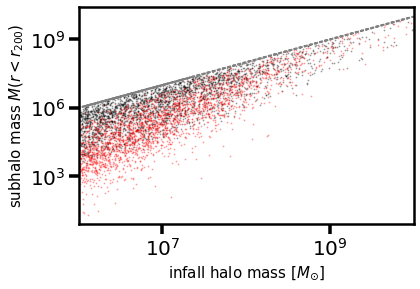

In [18]:
fig = plt.figure(1)

ax = plt.subplot(111)
kwargs_plot={'alpha': 0.25, 's': 1}
plot_subhalo_bound_mass(wdm, ax=ax, kwargs_plot=kwargs_plot, color='k')
kwargs_plot={'alpha': 0.25, 's': 1}
plot_subhalo_bound_mass(wdm_v2, ax=ax, kwargs_plot=kwargs_plot, color='r')


### Concentration-mass relation 

In [19]:
kwargs_truncation_model_subhalos = {'median_rt_over_rs':5.0, 'c_power': 3.0}
wdm_v3 = WDM(0.5, 1.5, log_mc=6.5, sigma_sub=5*sigma_sub, LOS_normalization=0.0, 
                       truncation_model_subhalos='TRUNCATION_MEAN_DENSITY',
                       kwargs_truncation_model_subhalos=kwargs_truncation_model_subhalos)

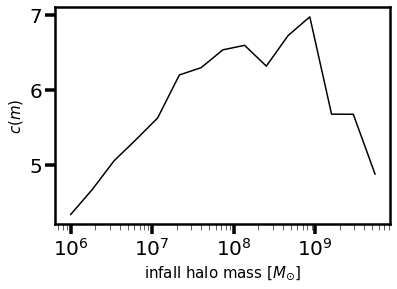

In [20]:
plot_concentration_mass_relation(wdm_v3, 'z_lens',nbins=15)